<a href="https://colab.research.google.com/github/rajuc72/Basic-Neural-Networks/blob/main/CNN_animalX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Write a program to implement an Xception CNN with a custom dataset.

In [1]:
#upload zipfile to google colab
from google.colab import files
uploaded = files.upload()

Saving animal class.zip to animal class.zip


In [2]:
import os

# List all files and directories in /content/
content_path = '/content/'
items_in_content = os.listdir(content_path)

print(f"Contents of {content_path}:")
for item in items_in_content:
    print(item)

Contents of /content/:
.config
animal class.zip
sample_data


In [3]:
#load the zip folder and unzip
import zipfile
import os

zip_file_path = "/content/animal class.zip" # Corrected path to the zip file
extract_dir = "/content/animal_class" # Replace with the desired extraction directory

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Successfully unzipped {zip_file_path} to {extract_dir}")

Successfully unzipped /content/animal class.zip to /content/animal_class


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset directory
base_dataset_dir = '/content/animal_class' # Base directory containing train, valid, test folders

# Define image size and batch size
img_height = 299
img_width = 299
batch_size = 32

# Create ImageDataGenerators for training, validation, and test
# We will apply normalization here as part of the generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# Load images from directories using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dataset_dir, 'train'), # Point to the train subdirectory
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse' # Use 'sparse' for integer labels
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dataset_dir, 'valid'), # Point to the valid subdirectory
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dataset_dir, 'test'), # Point to the test subdirectory
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False # Keep order for evaluation
)

print("Training data generator created:", train_generator)
print("Validation data generator created:", val_generator)
print("Test data generator created:", test_generator)

# You can get the number of classes from any of the generators
num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")

# unique Class labels
class_labels = train_generator.class_indices
print(f"Class labels: {class_labels}")

Found 9468 images belonging to 45 classes.
Found 2705 images belonging to 45 classes.
Found 1352 images belonging to 45 classes.
Training data generator created: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7eefd1b9ff50>
Validation data generator created: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7eef88655b50>
Test data generator created: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7eef59816360>
Number of classes: 45
Class labels: {'african_elephant': 0, 'alpaca': 1, 'american_bison': 2, 'anteater': 3, 'arctic_fox': 4, 'armadillo': 5, 'baboon': 6, 'badger': 7, 'blue_whale': 8, 'brown_bear': 9, 'camel': 10, 'dolphin': 11, 'giraffe': 12, 'groundhog': 13, 'highland_cattle': 14, 'horse': 15, 'jackal': 16, 'kangaroo': 17, 'koala': 18, 'manatee': 19, 'mongoose': 20, 'mountain_goat': 21, 'opossum': 22, 'orangutan': 23, 'otter': 24, 'polar_bear': 25, 'porcupine': 26, 'red_panda': 27, 'rhinoceros': 28, 'sea_lion': 29, 'sea

## Build the xception model

### Subtask:
Load the pre-trained Xception model and modify it for your custom dataset.


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# num_classes is already defined from the data generators in the previous cell

print(f"Number of classes: {num_classes}")

# Load the pre-trained Xception model, excluding the top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a dense layer with the number of units equal to the number of classes
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Display the model summary
model.summary()

Number of classes: 45
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 20,953,685 (79.93 MB)

 Trainable params: 20,899,157 (79.72 MB)

 Non-trainable params: 54,528 (213.00 KB)

**Reasoning**:
The previous attempt failed because `train_ds` was not defined. This indicates that the dataset loading and preprocessing step failed. Since the number of classes is needed to build the model, the dataset must be successfully loaded first. I will attempt to load the dataset again, as it's essential for determining the number of classes required for the model's final layer.



In [6]:
import os

dataset_dir = '/content/animal_class'
if os.path.exists(dataset_dir):
    print(f"Contents of {dataset_dir}:")
    for item in os.listdir(dataset_dir):
        print(item)
else:
    print(f"Directory not found: {dataset_dir}")

Contents of /content/animal_class:
README.dataset.txt
train
README.roboflow.txt
test
valid


## Add Model Checkpointing and Early Stopping

### Subtask:
Add ModelCheckpoint and EarlyStopping callbacks to the model training process.

**Reasoning**:
Import necessary callbacks from TensorFlow and add ModelCheckpoint to save the best model based on validation accuracy and EarlyStopping to stop training when validation accuracy stops improving.

In [7]:
#Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
# ModelCheckpoint to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    'best_xception_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# EarlyStopping to stop training when validation accuracy stops improving
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=4, # Number of epochs with no improvement after which training will be stopped.
    mode='max',
    verbose=1,
    restore_best_weights=True # Restores model weights from the epoch with the best value of the monitored quantity.
)



In [9]:
# Train the model with callbacks
epochs = 30 # Increased epochs as early stopping will prevent overfitting
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[checkpoint, early_stopping] # Add the callbacks here
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6891 - loss: 1.2188
Epoch 1: val_accuracy improved from -inf to 0.70536, saving model to best_xception_model.keras
296/296 ━━━━━━━━━━━━━━━━━━━━ 472s 1s/step - accuracy: 0.6894 - loss: 1.2176 - val_accuracy: 0.7054 - val_loss: 1.2610
Epoch 2/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.8677 - loss: 0.4621
Epoch 2: val_accuracy improved from 0.70536 to 0.72348, saving model to best_xception_model.keras
296/296 ━━━━━━━━━━━━━━━━━━━━ 274s 925ms/step - accuracy: 0.8677 - loss: 0.4621 - val_accuracy: 0.7235 - val_loss: 1.2305
Epoch 3/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.8853 - loss: 0.3888
Epoch 3: val_accuracy improved from 0.72348 to 0.78743, saving model to best_xception_model.keras
296/296 ━━━━━━━━━━━━━━━━━━━━ 274s 923ms/step - accuracy: 0.8853 - loss: 0.3887 - val_accuracy: 0.7874 - val_loss: 0.8953
Epoch 4/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.9149 - loss: 0.2871


In [10]:
#Save the model
model.save('xception_animal.keras')

In [11]:
#Download model
from google.colab import files
files.download('xception_animal.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
#Save the model to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


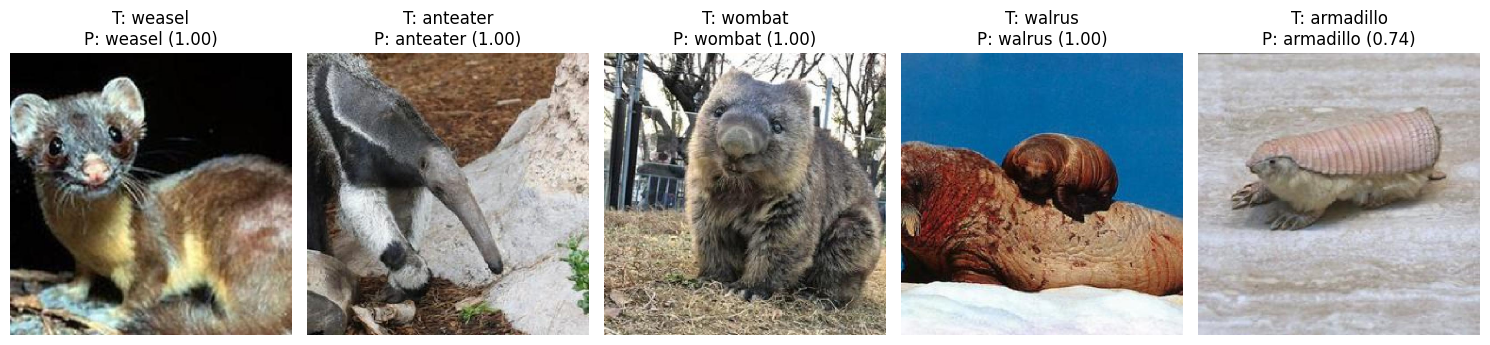

In [14]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow import keras # Import keras


# === Config ===
DATA_DIR = '/content/animal_class/test'  # Same directory used by test_generator
MODEL_PATH = 'xception_animal.keras'
IMG_SIZE = (299, 299)  # Adjust to match your model input

# === Load model ===
modelx = keras.models.load_model(MODEL_PATH)

# === Build class mapping ===
class_names = sorted(os.listdir(DATA_DIR))
class_map = {i: name for i, name in enumerate(class_names)}

# === Collect all image paths ===
all_image_paths = []
for class_name in class_names:
    class_dir = os.path.join(DATA_DIR, class_name)
    for fname in os.listdir(class_dir):
        if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            all_image_paths.append((os.path.join(class_dir, fname), class_name))

# === Sample 5 random images ===
sampled = random.sample(all_image_paths, 5)

# === Load, preprocess, and predict ===
images = []
true_labels = []
for path, label in sampled:
    img = image.load_img(path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    images.append(img_array)
    true_labels.append(label)

images_np = np.array(images)
preds = modelx.predict(images_np, verbose=0)
pred_indices = np.argmax(preds, axis=1)
confidences = np.max(preds, axis=1)

# === Display results ===
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"T: {true_labels[i]}\nP: {class_map[pred_indices[i]]} ({confidences[i]:.2f})")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [15]:
#load the model
from tensorflow import keras
import os

model_path = 'xception_animal.keras'

# Check if the model file exists
if not os.path.exists(model_path):
    print(f"Error: Model file not found at {model_path}")
    print("Contents of the current directory:")
    print(os.listdir('.')) # Print contents of the current directory
else:
    model = keras.models.load_model(model_path)
    print("Model loaded successfully!")

Model loaded successfully!


In [4]:
from google.colab import drive
drive.mount = '/content/drive'


In [16]:
#load the image
from google.colab import files
uploaded = files.upload()

Saving 4165454.jpg to 4165454.jpg


In [17]:
#preprocess the image
image_path = '/content/4165454.jpg'
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)#expand dims or making batch
img_preprocessed = img_array / 255.0


In [18]:
#Make Prediction
predictions = model.predict(img_preprocessed)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = np.max(predictions)
print(f"Prediction: {predicted_class}, Confidence: {confidence}")
predicted_label = class_names[predicted_class]
print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
Prediction: 6, Confidence: 0.9999997615814209
Predicted Label: baboon
